In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Create your df here:
df = pd.read_csv("profiles.csv")

In [2]:
print(len(df))

59946


In [4]:
df['edu_cat'] = df['education'].map({ "graduated from college/university": 2, "graduated from masters program": 3, "working on college/university": 1, "working on masters program": 3, "graduated from two-year college": 2, "graduated from high school": 2, "graduated from ph.d program": 7, "graduated from law school": 5, "working on two-year college": 1, "dropped out of college/university": 2, "working on ph.d program": 3, "college/university": 1, "graduated from space camp": 3, "dropped out of space camp": 1, "graduated from med school": 6, "working on space camp": 1, "working on law school": 1, "two-year college": 1, "working on med school": 1, "dropped out of two-year college": 1, "dropped out of masters program": 3, "masters program": 4, "dropped out of ph.d program": 3, "dropped out of high school": 1, "high school": 1, "working on high school": 1, "space camp": 1, "ph.d program": 3, "law school": 1, "dropped out of law school": 1, "dropped out of med school": 1, "med school": 1 })
df['income_cat'] = df['income'].map({ -1: 1, 20000: 2, 30000: 2, 40000: 2, 50000: 3, 60000: 3, 70000: 3, 80000: 3, 100000: 3, 150000: 4, 250000: 4, 500000: 4, 1000000: 4 })
df['job_cat'] = df['job'].map({ "other": 2, "student": 1, "science / tech / engineering": 3, "computer / hardware / software": 3, "artistic / musical / writer": 2, "sales / marketing / biz dev": 2, "medicine / health": 3, "education / academia": 2, "executive / management": 2, "banking / financial / real estate": 2, "entertainment / media": 2, "law / legal services": 2, "hospitality / travel": 2, "construction / craftsmanship": 2, "clerical / administrative": 2, "political / government": 2, "rather not say": 2, "transportation": 2, "unemployed": 1, "retired": 1, "military": 2 })
                                                                                    
rows_to_cluster = df.dropna(subset = ["income", "age","income_cat","education","edu_cat","height","job","job_cat"])

In [5]:
df.isna().any()

age            False
body_type       True
diet            True
drinks          True
drugs           True
education       True
essay0          True
essay1          True
essay2          True
essay3          True
essay4          True
essay5          True
essay6          True
essay7          True
essay8          True
essay9          True
ethnicity       True
height          True
income         False
job             True
last_online    False
location       False
offspring       True
orientation    False
pets            True
religion        True
sex            False
sign            True
smokes          True
speaks          True
status         False
edu_cat         True
income_cat     False
job_cat         True
dtype: bool

In [6]:
df.income_cat.value_counts()

1    48442
3     5150
2     5005
4     1349
Name: income_cat, dtype: int64

In [7]:
df.edu_cat.value_counts()

2.0    27913
3.0    12577
1.0     9852
7.0     1272
5.0     1122
6.0      446
4.0      136
Name: edu_cat, dtype: int64

In [8]:
print(len(rows_to_cluster))

48175


In [9]:
df.corr()

,age,height,income,edu_cat,income_cat,job_cat
age,1.000000,-0.022262,-0.001004,0.254415,0.056184,0.142330
height,-0.022262,1.000000,0.065049,-0.007099,0.111485,0.075568
income,-0.001004,0.065049,1.000000,-0.005209,0.605307,0.007438
edu_cat,0.254415,-0.007099,-0.005209,1.000000,-0.007000,0.227404
income_cat,0.056184,0.111485,0.605307,-0.007000,1.000000,0.050451
job_cat,0.142330,0.075568,0.007438,0.227404,0.050451,1.000000


In [10]:
#all_data = df[['age', 'income']]
df.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

In [11]:
#from sklearn.preprocessing import MinMaxScaler

#feature_data = df[['age', 'income_cat']]

#x = feature_data.values
#min_max_scaler = MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)


#features = pd.DataFrame(x_scaled, columns=feature_data.columns)
features_selection = df[['age', 'edu_cat',"income_cat","job_cat"]]

features_sel_wna = features_selection.dropna(subset = ["age","edu_cat","income_cat","job_cat"])
features = features_sel_wna[['age', 'edu_cat','job_cat']]
labels = features_sel_wna[["income_cat"]]


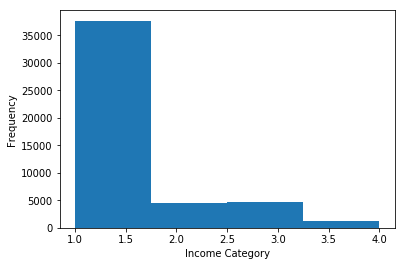

In [12]:
from matplotlib import pyplot as plt
plt.hist(features_sel_wna.income_cat, bins=4)
plt.xlabel("Income Category")
plt.ylabel("Frequency")
#plt.xlim(16, 80)
plt.show()

In [13]:
print(len(features))

48175


In [14]:
print(len(labels))

48175


In [15]:
any(np.isnan(features))

True

In [41]:
all(np.isfinite(features))

True

### KNeighborsClassifer 

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 1)

#print(X_train.head())
#print(y_train.head().values.ravel())

#print(type(y_train.head()))
#print(type(y_train.head().values.ravel()))

cols = ['age', 'edu_cat','job_cat']

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15)
#classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train.values.ravel())
print(classifier.score(X_test, y_test))


0.7853658536585366


In [19]:
kn_predict = classifier.predict(X_test)
#print(type(unknown_predict))

kn_predict_df = pd.DataFrame({
    'kn_predict_label': kn_predict
})

print(type(kn_predict_df))
kn_predict_df.kn_predict_label.value_counts()


<class 'pandas.core.frame.DataFrame'>


1    9598
2      32
3       5
Name: kn_predict_label, dtype: int64

In [20]:
y_test.income_cat.value_counts()

1    7581
2     929
3     887
4     238
Name: income_cat, dtype: int64

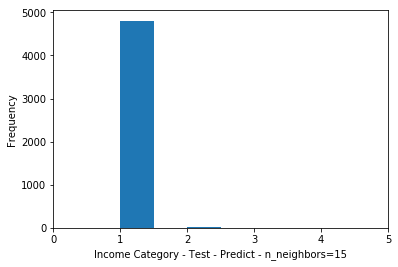

In [39]:
from matplotlib import pyplot as plt

test_predict = classifier.predict(X_test)

plt.hist( test_predict, bins=4)
plt.xlabel("Income Category - Test - Predict - n_neighbors=15")
#plt.xlabel("Income Category - Test - Predict - n_neighbors=5")
plt.ylabel("Frequency")
plt.xlim(0, 5)
plt.show()

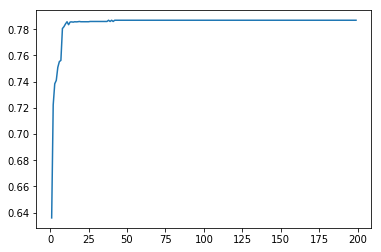

In [22]:
scores = []
for k in range(1, 200):
    classifier_n = KNeighborsClassifier(n_neighbors = k)
    classifier_n.fit(X_train, y_train.values.ravel())
    scores.append(classifier_n.score(X_test, y_test))
    
plt.plot(range(1,200), scores)
plt.show()

In [23]:
no_income = df[(df.job == 'student') | (df.job == 'retired') ]
no_income_feat_select = no_income[['age', 'edu_cat',"income_cat","job_cat"]]
no_income_sel_wna = no_income_feat_select.dropna(subset = ["age","edu_cat","income_cat","job_cat"])
no_income_feat = no_income_sel_wna[['age', 'edu_cat',"job_cat"]]
no_income_labels = no_income_sel_wna[["income_cat"]]

In [24]:
print(classifier.score(no_income_feat, no_income_labels.values.ravel()))

0.7903487429034874


In [25]:
no_income_predict = classifier.predict(no_income_feat)
#print(type(unknown_predict))

no_income_predict_df = pd.DataFrame({
    'no_income_predict_label': no_income_predict
})

print(type(no_income_predict_df))
no_income_predict_df.no_income_predict_label.value_counts()

<class 'pandas.core.frame.DataFrame'>


1    4932
Name: no_income_predict_label, dtype: int64

In [26]:
no_income_labels.income_cat.value_counts()

1    3898
2     912
4      77
3      45
Name: income_cat, dtype: int64

In [27]:
unknown = df[(df.job == 'other') | (df.job == 'rather not say') ]
unknown_feat_select = unknown[['age', 'edu_cat',"income_cat","job_cat"]]
unknown_sel_wna = unknown_feat_select.dropna(subset = ["age","edu_cat","income_cat","job_cat"])
unknown_feat = unknown_sel_wna[['age', 'edu_cat',"job_cat"]]
unknown_labels = unknown_sel_wna[["income_cat"]]

In [28]:
print(classifier.score(unknown_feat, unknown_labels.values.ravel()))

0.7939920077166873


In [29]:
unknown_predict = classifier.predict(unknown_feat)
#print(type(unknown_predict))

unknown_predict_df = pd.DataFrame({
    'unknown_predict_label': unknown_predict
})

print(type(unknown_predict_df))
unknown_predict_df.unknown_predict_label.value_counts()

<class 'pandas.core.frame.DataFrame'>


1    7195
2      62
Name: unknown_predict_label, dtype: int64

In [30]:
unknown_labels.income_cat.value_counts()

1    5765
2     915
3     468
4     109
Name: income_cat, dtype: int64

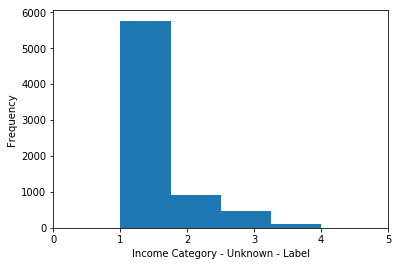

In [31]:
from matplotlib import pyplot as plt
plt.hist( unknown_sel_wna.income_cat, bins=4)
plt.xlabel("Income Category - Unknown - Label")
plt.ylabel("Frequency")
plt.xlim(0, 5)
plt.show()

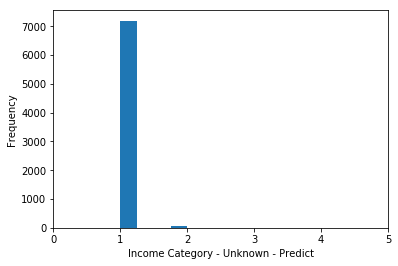

In [40]:
from matplotlib import pyplot as plt
plt.hist( unknown_predict, bins=4)
plt.xlabel("Income Category - Unknown - Predict")
plt.ylabel("Frequency")
plt.xlim(0, 5)
plt.show()

### KMeans

In [33]:
from sklearn.cluster import KMeans
import random
import timeit
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.1, random_state = 1)

kmeans_model = KMeans(n_clusters = 4)
kmeans_model.fit(X_train)
kmeans_label = kmeans_model.predict(X_train)
print(kmeans_label)

print(type(kmeans_label))
print(len(kmeans_label))

kmeans_label_df = pd.DataFrame({
    'kmeans_label': kmeans_label
})

print(type(kmeans_label_df))
kmeans_label_df.kmeans_label.value_counts()

[0 0 1 ... 3 2 1]
<class 'numpy.ndarray'>
43357
<class 'pandas.core.frame.DataFrame'>


0    18136
2    14966
1     7563
3     2692
Name: kmeans_label, dtype: int64

In [34]:
kmeans_label_cluster = kmeans_model.labels_
print(type(kmeans_label_cluster))

X_train["kmeans_label_cluster"] = kmeans_label_cluster

#Add the column into our list
cols.extend(["kmeans_label_cluster"])

#Lets analyze the clusters
print(X_train[cols].groupby(['kmeans_label_cluster']).mean())

<class 'numpy.ndarray'>
                            age   edu_cat   job_cat
kmeans_label_cluster                               
0                     24.755459  1.906374  2.026687
1                     42.666534  2.578606  2.261669
2                     32.284177  2.512228  2.240478
3                     57.531947  2.675334  2.164933


E:\Python\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [35]:
X_train.kmeans_label_cluster.value_counts()

0    18136
2    14966
1     7563
3     2692
Name: kmeans_label_cluster, dtype: int64

In [36]:
print(kmeans_model.labels_)

cluster_zero_indices = []
cluster_one_indices = []
cluster_two_indices = []
cluster_three_indices = []
for i in range(len(kmeans_model.labels_)):
    if kmeans_model.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif kmeans_model.labels_[i] == 1:
        cluster_one_indices.append(i)
    elif kmeans_model.labels_[i] == 2:
        cluster_two_indices.append(i)
    elif kmeans_model.labels_[i] == 3:
        cluster_three_indices.append(i)
        
print(cluster_zero_indices)

[0 0 1 ... 3 2 1]
[0, 1, 7, 8, 9, 11, 15, 16, 17, 19, 20, 28, 33, 42, 43, 44, 45, 50, 56, 57, 58, 59, 61, 62, 69, 71, 72, 77, 78, 84, 85, 86, 87, 91, 94, 96, 98, 100, 103, 104, 105, 106, 108, 109, 116, 117, 118, 121, 122, 123, 124, 125, 128, 129, 130, 132, 133, 136, 137, 138, 140, 142, 146, 150, 152, 160, 161, 162, 167, 169, 171, 177, 178, 183, 185, 187, 190, 195, 196, 197, 198, 199, 200, 202, 205, 206, 209, 213, 215, 216, 220, 221, 224, 225, 226, 227, 229, 230, 231, 233, 240, 241, 243, 244, 245, 246, 247, 248, 250, 257, 263, 265, 270, 271, 279, 287, 290, 291, 293, 296, 298, 299, 307, 311, 312, 314, 315, 316, 319, 322, 323, 325, 326, 333, 335, 338, 339, 340, 343, 349, 350, 351, 359, 361, 362, 366, 368, 369, 372, 373, 376, 378, 380, 381, 383, 384, 386, 388, 390, 391, 393, 395, 398, 400, 402, 403, 405, 406, 407, 409, 412, 415, 416, 417, 419, 420, 421, 424, 426, 428, 429, 431, 442, 444, 446, 447, 448, 450, 451, 452, 453, 454, 458, 459, 463, 465, 466, 468, 471, 477, 478, 479, 480, 482, 483

In [48]:
cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster.iloc[cluster_one_indices]
cluster_two_df = rows_to_cluster.iloc[cluster_two_indices]
cluster_three_df = rows_to_cluster.iloc[cluster_three_indices]

print(len(cluster_zero_df))
print(len(cluster_one_df))
print(len(cluster_two_df))
print(len(cluster_three_df))

print(cluster_zero_df['income_cat'].value_counts()/len(cluster_zero_df))
print(cluster_one_df['income_cat'].value_counts()/len(cluster_one_df))
print(cluster_two_df['income_cat'].value_counts()/len(cluster_two_df))
print(cluster_three_df['income_cat'].value_counts()/len(cluster_three_df))

18136
7563
14966
2692
1    0.777018
3    0.100077
2    0.097320
4    0.025584
Name: income_cat, dtype: float64
1    0.773503
2    0.101679
3    0.096390
4    0.028428
Name: income_cat, dtype: float64
1    0.786650
3    0.097755
2    0.091274
4    0.024322
Name: income_cat, dtype: float64
1    0.784175
3    0.106984
2    0.086181
4    0.022660
Name: income_cat, dtype: float64


In [38]:
print(kmeans_model.score(X_test,y_test))

-48728.08751180455
